In [187]:
# Örnek:
from IPython.display import Image
from IPython.core.display import HTML 

<font size=4 color='orange'> Taylor Serisi Yöntemi

<font size=4 color='orange'>Euler ve Heun (Geliştirilmiş Euler) Yöntemleri

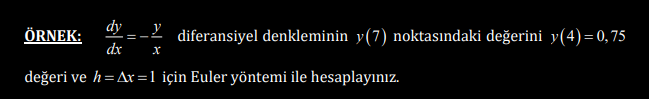

In [5]:
Image("euler.png")

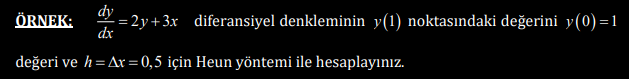

In [188]:
Image("heun.png")

In [1]:
%reset -f
import math
import sympy as sp
import pandas as pd
from numpy import transpose as tr

In [2]:
'''giriş'''
# verilen fonksiyon dy/dx
def Dy(x,y): return 2*y+3*x
# verilen x0 ve y0 değerleri:: y0(x0)
v  = [0,1]
dx = .5
# istenen y' için verilen x1 değeri:: y1(x1)
sx = 1
# yöntem
ynt='hun'

In [3]:
X=[]
X.clear()
X.append(v[0])
n=int((sx-v[0])/dx)
for i in range(1,n): X.append(round(X[i-1]+dx,3))
X.append(sx)
print('X=',X)

X= [0, 0.5, 1]


In [4]:
elr=[]
elr.clear()
elr.append(v[1])

hun=[]
hun.clear()
hun.append(v[1]) 

for i in range(len(X)-1):
    if ynt=='hun':        
        elr.append(round( hun[i] + dx*Dy(X[i],hun[i]),3))
        hun.append(round( hun[i] + ( Dy(X[i],hun[i]) + Dy(X[i+1],elr[i+1]))*(dx/2),3))
    else: elr.append(elr[i] + dx*Dy(X[i],elr[i]))    
#print('Euler Y = ',elr,'\nHeun Y = ',hun)   

In [5]:
'''sonuç'''
if ynt=='hun': print('euler: ',elr[-1],'\theun: ',hun[-1])
else: print('euler: ',elr[-1])

euler:  6.5 	heun:  8.688


In [6]:
pd.DataFrame(tr([X,elr,hun]),columns=['x','euler_y','heun_y']).style.hide_index().set_precision(3)

x,euler_y,heun_y
0.000,1.000,1.000
0.500,2.000,2.875
1.000,6.500,8.688


In [7]:
'''gerçek değer'''
# gerçek sonuç
u   = sp.symbols('u')
f   = sp.Function('f')
f_  = sp.Derivative(f(u), u)
eq  = sp.Eq(f_, Dy(u,f(u)))
res = sp.dsolve(eq, f(u), ics={f(v[0]):v[1]}).subs({u:sx})
res.evalf()

Eq(f(1), 10.6808481731286)